In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-future-prediction/Employee.csv


> # Loading Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> # Reading Data

In [3]:
df=pd.read_csv('/kaggle/input/employee-future-prediction/Employee.csv')


> # Data

* Education : Education Level
* Joining Year : Year of Joining Company
* City : City office where posted
* Payment Tier : 1:Highest, 2:Mid Level, 3:Lowest
* Age : Current age of employee
* Gender : Gender of employee
* Ever Benched : Ever kept out of project.
* ExperienceInCurrentDomain : Experience in current Field.
* Leave or Not : Wheather employee leaves the company .
 

> # Dimension of Data

In [4]:
df.shape

(4653, 9)

The data contains 4653 rows and 9 columns

In [5]:
org_df=df.copy()

> # Features of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


as we can see there are 5 numerical and 4 categorical variables.

> # Missing Data

In [7]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

There is 0 null values in this dataset.

In [8]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [9]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [10]:
cat_data=df.select_dtypes(include=[np.object])
cat_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes


In [11]:
num_data=df.select_dtypes(include=[np.number])
num_data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

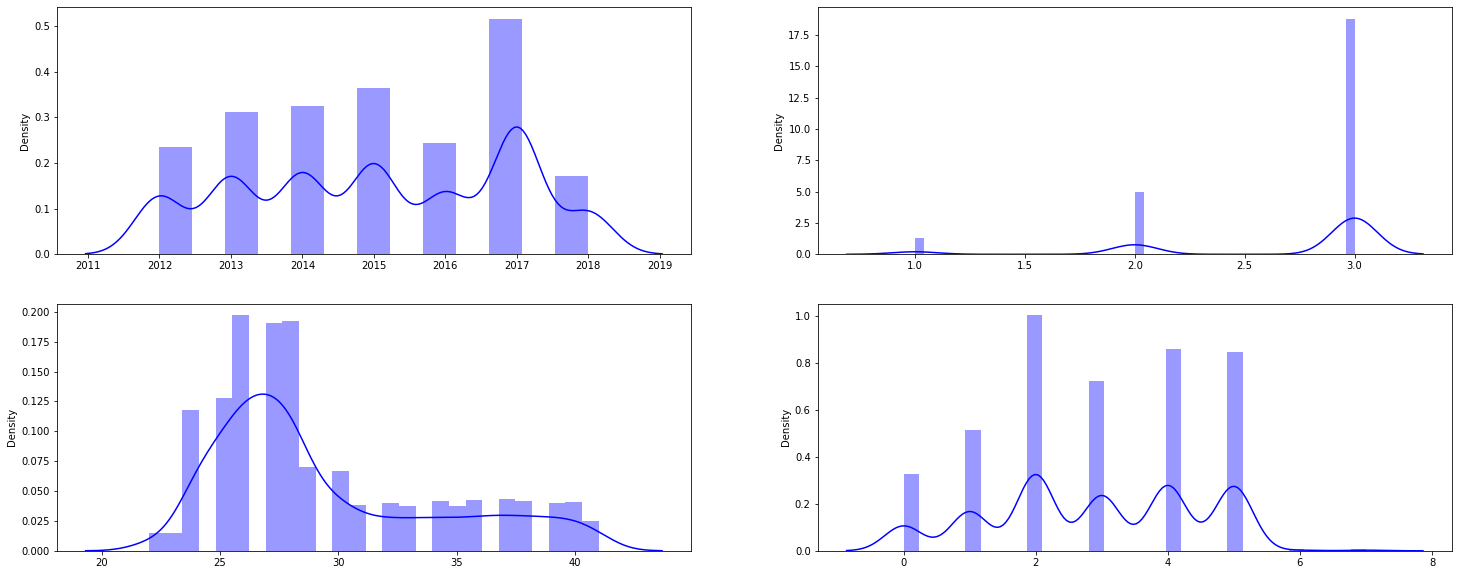

In [12]:
fig,axes=plt.subplots(2,2,figsize=(25,10))
cols=[['JoiningYear','PaymentTier'],['Age','ExperienceInCurrentDomain']]
for i in range (len(cols)):
    for j in range(len(cols)):
        sns.distplot(x=df[cols[i][j]],ax=axes[i,j],color='b')

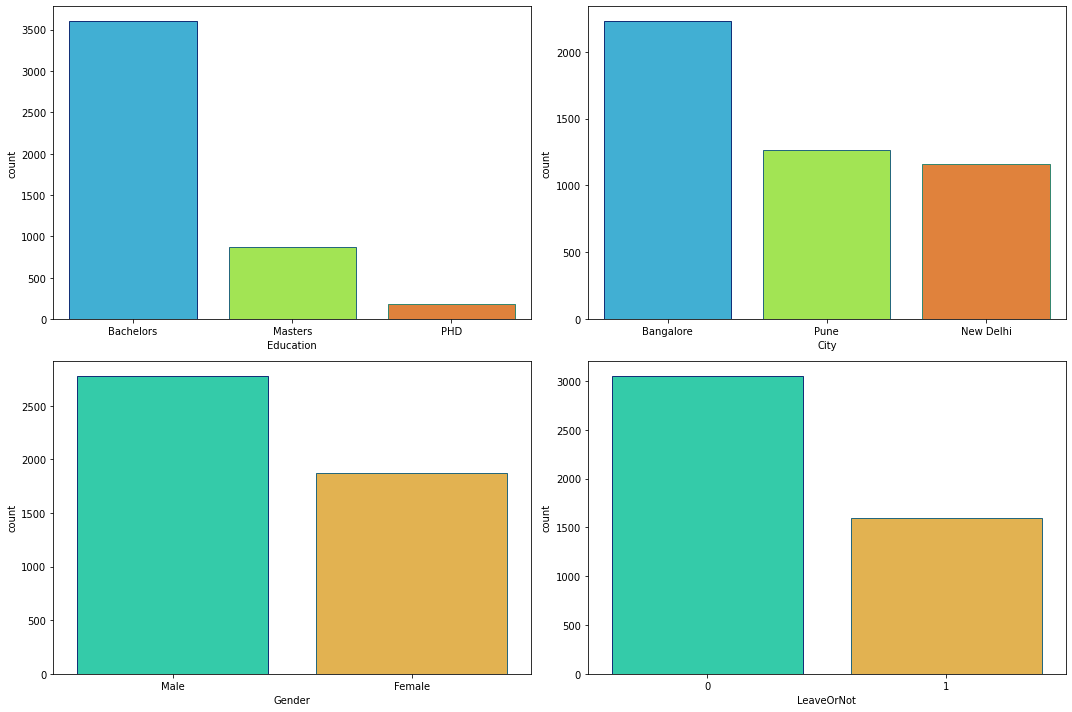

In [13]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

cols = [['Education','City'],['Gender','LeaveOrNot']]
for row in range(len(cols)):
    for col in range(len(cols)):
        sns.countplot(x=df[cols[row][col]],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8),ax=axes[row,col])

plt.tight_layout()
plt.subplots_adjust()

* Most of the employees has a bachelors degree whereas very less employees has PHD.
* Count of employees working in Bangalore is more
* Male employees are more than female emplolyees
* Count of employees leaving company is more 

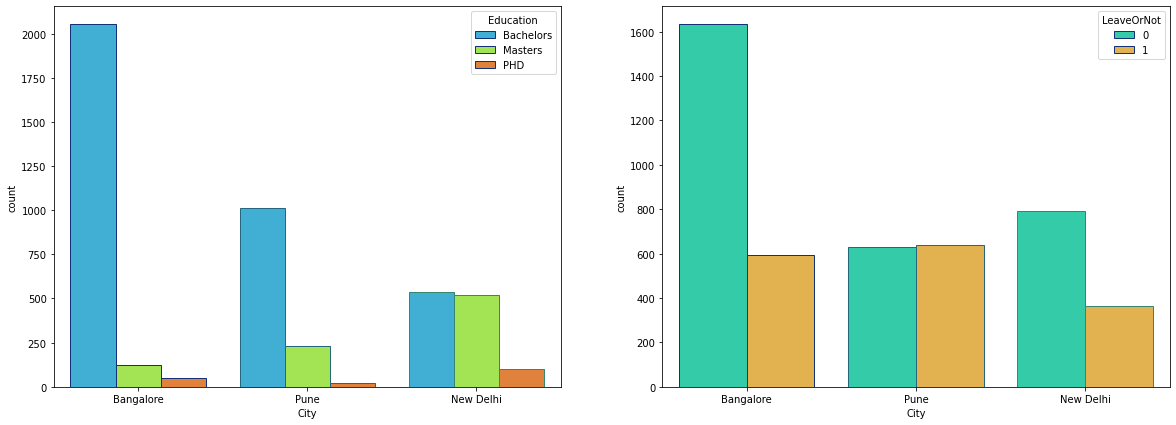

In [14]:
figure, axes=plt.subplots(1,2,figsize=(20,7))

cols=['Education','LeaveOrNot']

for i in range(len(cols)):    
    sns.countplot(x=df['City'],hue=df[cols[i]],ax=axes[i],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))


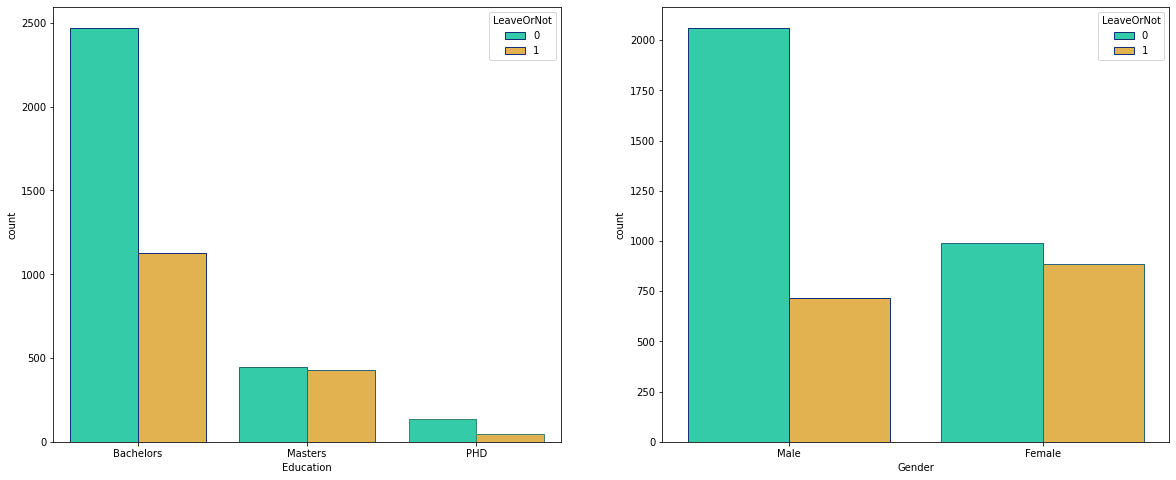

In [15]:
cols = ['Education','Gender']
figure, axes=plt.subplots(1,2,figsize=(20,8))

for i in range(len(cols)):
    sns.countplot(x=df[cols[i]],hue=df['LeaveOrNot'],ax=axes[i],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))

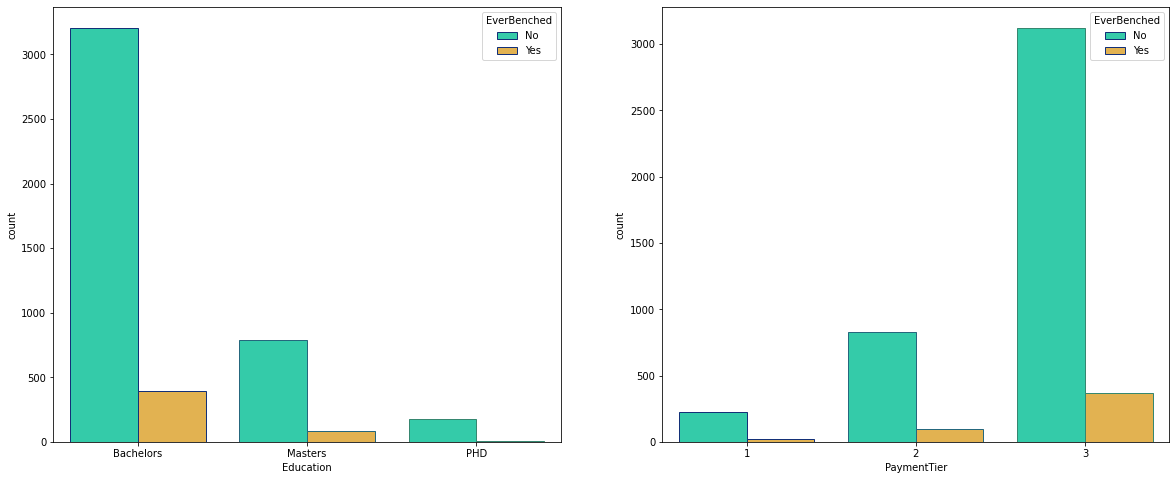

In [16]:
cols=['Education','PaymentTier']
figure, axes=plt.subplots(1,2,figsize=(20,8))
for i in range (len(cols)):
    sns.countplot(x=df[cols[i]],hue=df['EverBenched'],ax=axes[i],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))

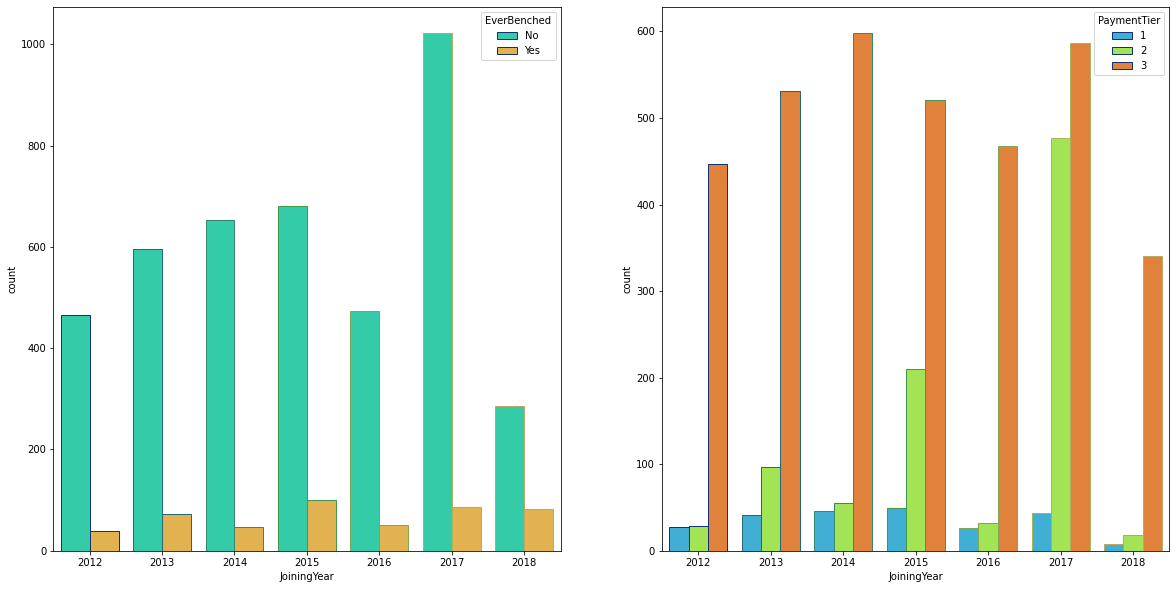

In [17]:
figure,axes=plt.subplots(1,2,figsize=(20,10))
cols=['EverBenched','PaymentTier']
for i in range (len(cols)):
    sns.countplot(x=df['JoiningYear'],hue=df[cols[i]],ax=axes[i],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='Education', ylabel='count'>

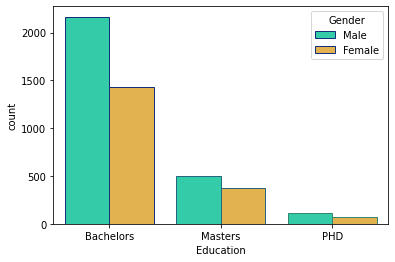

In [18]:
sns.countplot(x=df['Education'],hue=df['Gender'],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='Age', ylabel='count'>

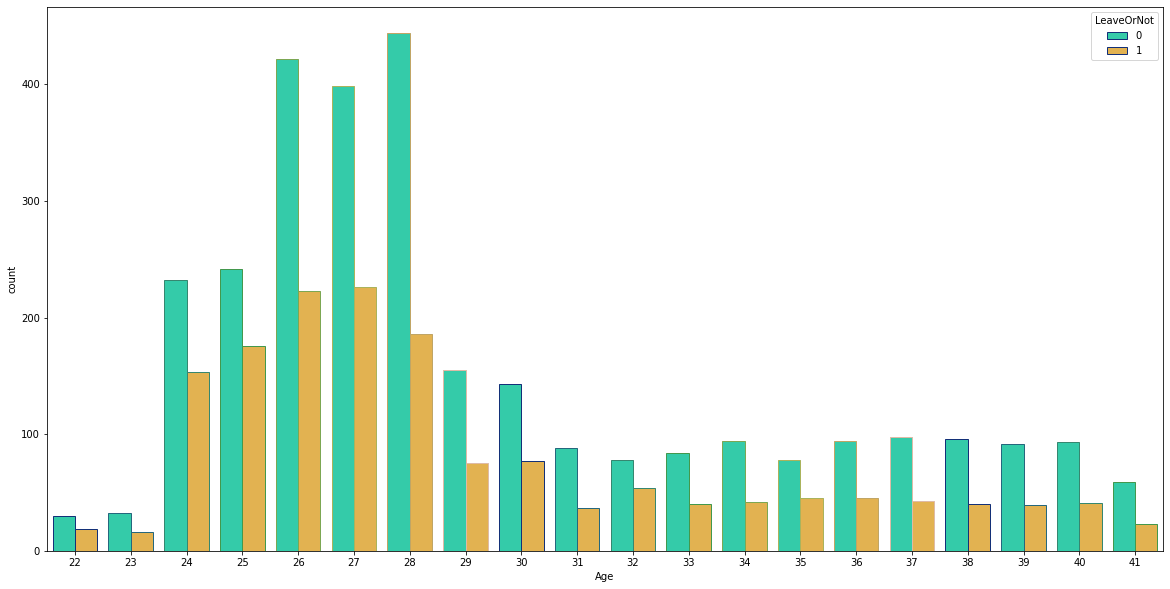

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Age'],hue=df['LeaveOrNot'],palette="turbo",edgecolor=sns.color_palette("gist_earth", 8))

In [20]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
